<a href="https://colab.research.google.com/github/marybaron/Intro-to-Machine-Learning/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6 - Mary Baron

# Ex 12.6 on page 512. Word Frequency Bar Chart and Word Cloud from Hamlet:

#Word Frequency Bar Chart from Hamlet
To run the commands, add the following at the beginning:

In [1]:
from nltk.corpus import stopwords

from pathlib import Path

from textblob import TextBlob

import nltk

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We downloaded Hamlet from http://www.gutenberg.org/files/2265/2265.txt To get the text, use the following:

In [2]:
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

Then we can use:

In [3]:
blob=TextBlob(data)

In [4]:
stop_words = stopwords.words('english')

Getting the word frequencies:

In [5]:
items = blob.word_counts.items()

Eliminating stopwords:

In [6]:
items = [item for item in items if item[0] not in stop_words]

Sorting by frequency:

In [7]:
from operator import itemgetter

In [8]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

Top 20 words:

In [9]:
top20 = sorted_items[1:21]

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [12]:
df

,word,count
0,lord,211
1,haue,175
2,king,173
3,shall,107
4,hamlet,106
5,come,106
6,thou,105
7,let,104
8,good,99
9,hor,95


Visualizing the bar chart:

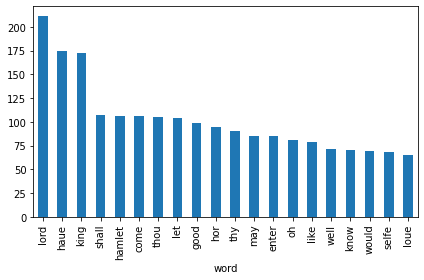

In [13]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

# Word Cloud from Hamlet

To import the mask_oval.png, we can use:

In [14]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

Configure the Word Cloud Object:

In [15]:
from wordcloud import WordCloud   

In [16]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')

Generate Word Cloud:

In [17]:
wordcloud = wordcloud.generate(data)

In [18]:
wordcloud = wordcloud.to_file('Hamlet.png')

Displaying the image with Mathplotlib:

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

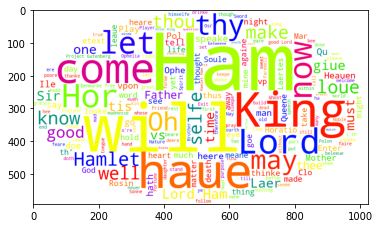

In [21]:
plt.imshow(wordcloud)